In [1]:
# Load the data
import pandas as pd


# We don't need the row_id in the data set
data = pd.read_csv('train.csv')
data = data.drop('row_id', axis = 1)
pd.options.display.max_rows = 7
data

,x,y,accuracy,time,place_id
0,0.7941,9.0809,54,470702,8523065625
1,5.9567,4.7968,13,186555,1757726713
2,8.3078,7.0407,74,322648,1137537235
...,...,...,...,...,...
29118018,2.9993,6.3680,67,737758,2838334300
29118019,4.0637,8.0061,70,764975,1007355847
29118020,7.4523,2.0871,17,102842,7028698129


In [26]:
'''
Get some general ideas about the training data set
'''

print('x        min:', data['x'].min(),
              ' mean:', data['x'].mean(),
              ' max:', data['x'].max())
print('y        min:', data['y'].min(),
              ' mean:', data['y'].mean(),
              ' max:', data['y'].max())
print('accuracy min:', data['accuracy'].min(),
              ' mean:', data['accuracy'].mean(),
              ' max:', data['accuracy'].max())

print('---------------------------------------------------')

data_len = len(data)
time_unique_len = len(data.time.unique())
place_unique_len = len(data.place_id.unique())
print('There are total', data_len, 'events')
print('There are total', time_unique_len, 'unique time epoches')
print('There are total', place_unique_len, 'unique place ids')

print('---------------------------------------------------')

print('On average there are', data_len/time_unique_len, 'events per time epoch,')
print('                 and', data_len/place_unique_len, 'events per location')


print(data['time'].min(), data['time'].max())

x        min: 0.0  mean: 4.999769830660826  max: 10.0
y        min: 0.0  mean: 5.001813928552262  max: 10.0
accuracy min: 1  mean: 82.84912494568226  max: 1033
---------------------------------------------------
There are total 29118021 events
There are total 786239 unique time epoches
There are total 108390 unique place ids
---------------------------------------------------
On average there are 37.03456709728212 events per time epoch,
                 and 268.6412122889565 events per location
1 786239


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.plt.rcParams['figure.figsize']=(8,5)
sns.distplot(data['accuracy'], kde = True, bins = 100)
sns.plt.title('Accuracy Histogram')
sns.plt.xlabel('Accuracy')
sns.plt.ylabel('frequency')


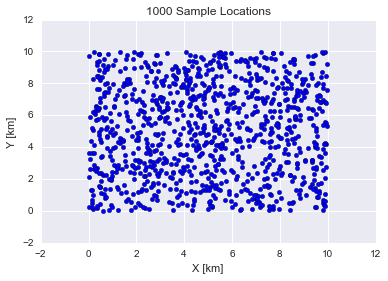

In [12]:
# Choose a subset data for display (the whole thing is huuuuuuuuge)
sample_size = 1000
sns.plt.scatter(data.x[:sample_size], data.y[:sample_size])
sns.plt.title(str(sample_size) + ' Sample Locations')
sns.plt.xlabel('X [km]')
sns.plt.ylabel('Y [km]')

In [16]:
train_data = data[:1000]
test_data = data[-200:]

x_train = train_data.drop('place_id', axis=1)
y_train = train_data.place_id
x_test = test_data.drop('place_id',axis=1)
y_test = test_data.place_id
print(x_train.shape, x_test.shape)
print(x_test)
print(y_test)

(1000, 4) (200, 4)
               x       y  accuracy    time
29117821  6.0633  0.5146        82  396115
29117822  4.2070  4.3529        96  473659
29117823  8.4635  4.9664       214  262053
...          ...     ...       ...     ...
29118018  2.9993  6.3680        67  737758
29118019  4.0637  8.0061        70  764975
29118020  7.4523  2.0871        17  102842

[200 rows x 4 columns]
29117821    7558188214
29117822    8553011522
29117823    9994646421
               ...    
29118018    2838334300
29118019    1007355847
29118020    7028698129
Name: place_id, dtype: int64


In [21]:
from sklearn import svm
clf = svm.SVC(decision_function_shape = 'ovo')
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
y_test = clf.predict(x_test)
print("R^2:", clf.score(x_test, y_test))
y_test

R^2: 1.0


array([9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313378,
       9328313378, 9328313378, 9328313378, 9328313378, 9328313